<a href="https://colab.research.google.com/github/SonaliSG/Practice-Codes/blob/main/Cross_Selll_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


!pip install imblearn

from sklearn.metrics import accuracy_score, f1_score,auc

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

df= pd.read_excel('/content/Cross Marketing Use Case.xlsx')
df.shape
df.head()
df.info()
df.isna()


#Exploratory Data Analysis
df.describe(include='all')

#Checking Distribution of numeric variables
#sns.displot(df['Age'])  #sns.displot(df['Credit_Score'])

#Creation of Derived Variables
bins = [18, 26, 31, 41, 51, 60, 70, 120]
labels = ['18-25', '25-30', '31-40', '41-50', '50-59', '60-69', '70+']
df['AgeGroup'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)


bins = [0, 651, 751, 851, 951, 1051, 1300]
labels = ['0-650', '650-750', '750-850', '850-950', '950-1050', '1050+']
df['CreditScore_Band'] = pd.cut(df.Credit_Score, bins, labels = labels,include_lowest = True)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ref                               16383 non-null  int64  
 1   Credit_Score                      16383 non-null  int64  
 2   Final_Grade                       16383 non-null  object 
 3   Term                              16383 non-null  int64  
 4   Net_Advance                       16383 non-null  float64
 5   APR                               16383 non-null  float64
 6   Loan_Type                         16383 non-null  object 
 7   Mosaic                            16383 non-null  int64  
 8   Mosaic_Class                      16383 non-null  int64  
 9   Time_at_Address                   16383 non-null  int64  
 10  Residential_Status                16383 non-null  object 
 11  Telephone_Indicator               16383 non-null  object 
 12  Numb

<Axes: xlabel='Worst_CUrrent_Status'>

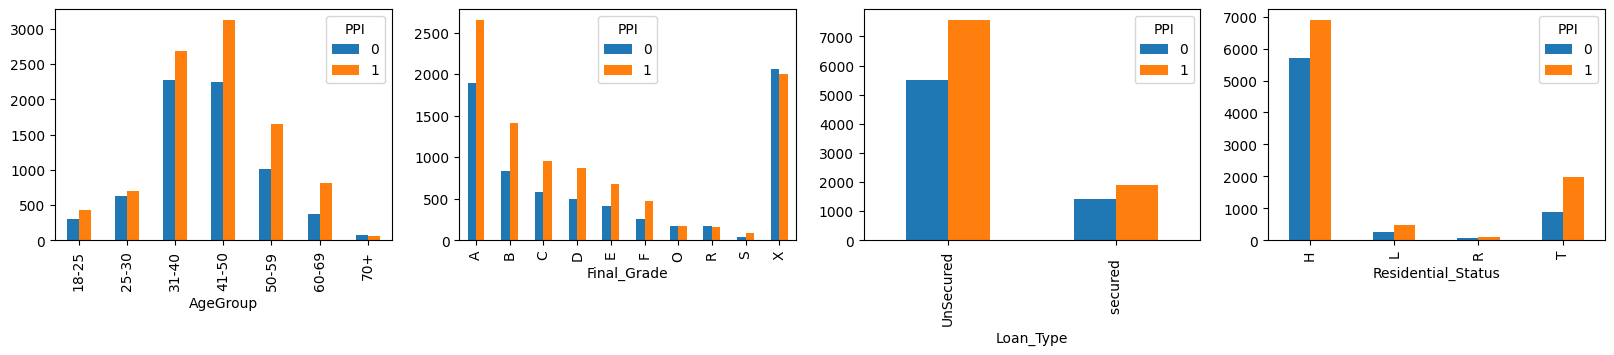

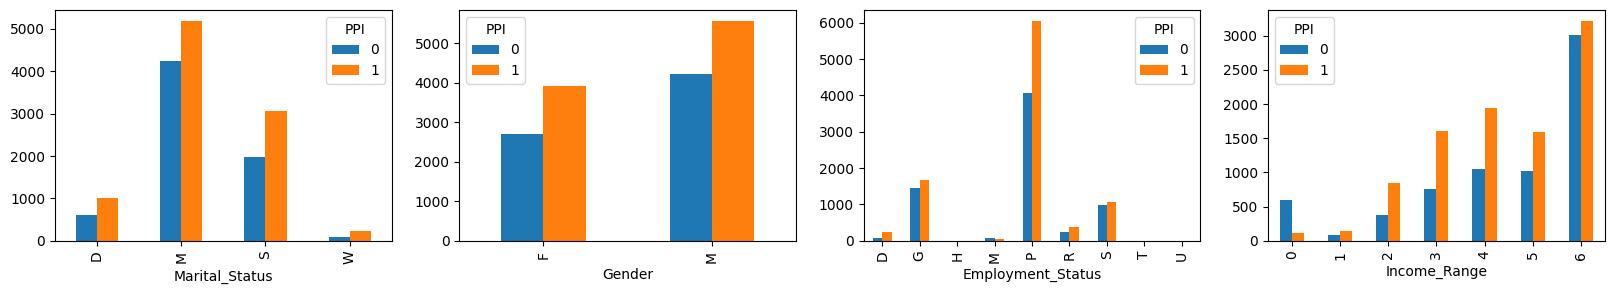

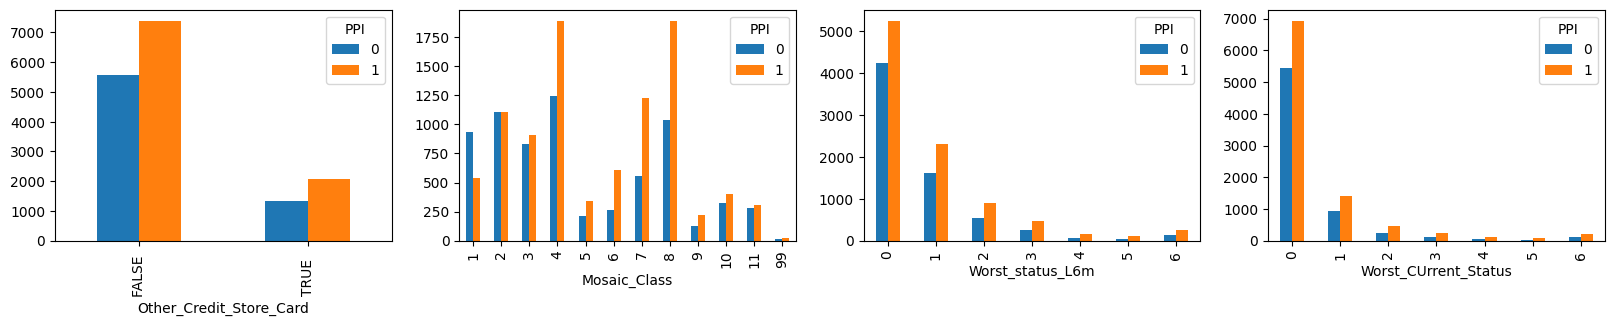

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,3))

pd1 = pd.crosstab(index=df['AgeGroup'],columns=df['PPI'])
pd2 = pd.crosstab(index=df['Final_Grade'],columns=df['PPI'])
pd3 = pd.crosstab(index=df['Loan_Type'],columns=df['PPI'])
pd4 = pd.crosstab(index=df['Residential_Status'],columns=df['PPI'])

pd1.iloc[:].plot.bar(stacked=False, ax=ax1)
pd2.iloc[:].plot.bar(stacked=False, ax=ax2)
pd3.iloc[:].plot.bar(stacked=False, ax=ax3)
pd4.iloc[:].plot.bar(stacked=False, ax=ax4)

fig, (ax5, ax6, ax7, ax8) = plt.subplots(1,4, figsize=(20,3))

pd5 = pd.crosstab(index=df['Marital_Status'],columns=df['PPI'])
pd6 = pd.crosstab(index=df['Gender'],columns=df['PPI'])
pd7 = pd.crosstab(index=df['Employment_Status'],columns=df['PPI'])
pd8 = pd.crosstab(index=df['Income_Range'],columns=df['PPI'])

pd5.iloc[:].plot.bar(stacked=False, ax=ax5)
pd6.iloc[:].plot.bar(stacked=False, ax=ax6)
pd7.iloc[:].plot.bar(stacked=False, ax=ax7)
pd8.iloc[:].plot.bar(stacked=False, ax=ax8)


fig, (ax9, ax10, ax11, ax12) = plt.subplots(1,4, figsize=(20,3))

pd9 = pd.crosstab(index=df['Other_Credit_Store_Card'],columns=df['PPI'])
pd10 = pd.crosstab(index=df['Mosaic_Class'],columns=df['PPI'])
pd11 = pd.crosstab(index=df['Worst_status_L6m'],columns=df['PPI'])
pd12 = pd.crosstab(index=df['Worst_CUrrent_Status'],columns=df['PPI'])

pd9.iloc[:].plot.bar(stacked=False, ax=ax9)
pd10.iloc[:].plot.bar(stacked=False, ax=ax10)
pd11.iloc[:].plot.bar(stacked=False, ax=ax11)
pd12.iloc[:].plot.bar(stacked=False, ax=ax12)


(0.0, 7.0)

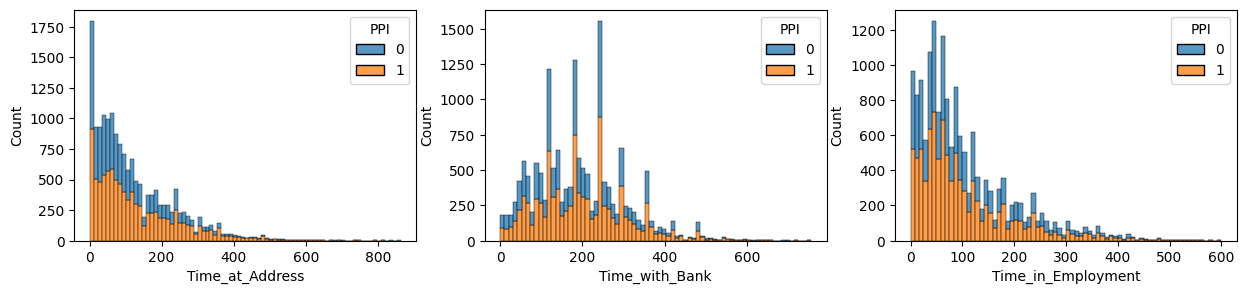

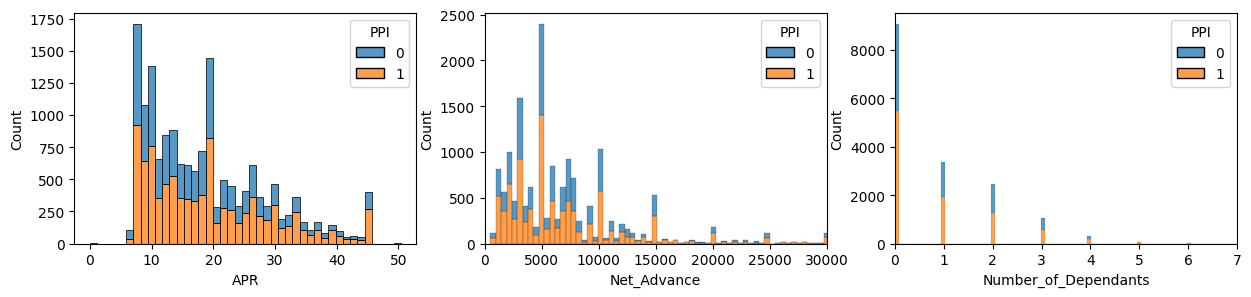

In [ ]:


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))

sns.histplot(data=df, x="Time_at_Address", hue="PPI", multiple="stack", ax=ax1)
sns.histplot(data=df, x="Time_with_Bank", hue="PPI", multiple="stack", ax=ax2)
sns.histplot(data=df, x="Time_in_Employment", hue="PPI", multiple="stack", ax=ax3)


fig, (ax4,ax5,ax6) = plt.subplots(1,3, figsize=(15,3))

sns.histplot(data=df, x="APR", hue="PPI", multiple="stack", ax=ax4)
sns.histplot(data=df, x="Net_Advance", hue="PPI", multiple="stack", ax=ax5)
ax5.set_xlim(0, 30000)
sns.histplot(data=df, x="Number_of_Dependants", hue="PPI", multiple="stack", ax=ax6)
ax6.set_xlim(0, 7)


<Axes: >

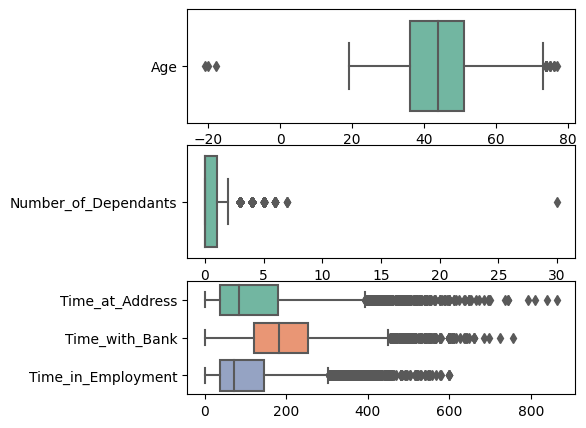

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(5,5))

df_1 = df[['Age']]
x1 = sns.boxplot(data=df_1, orient="h", palette="Set2", ax=ax1)
x1

df_2 = df[['Number_of_Dependants']]
x2 = sns.boxplot(data=df_2, orient="h", palette="Set2", ax=ax2)
x2

df_3 = df[['Time_at_Address', 'Time_with_Bank', 'Time_in_Employment']]
x3 = sns.boxplot(data=df_3, orient="h", palette="Set2", ax=ax3)
x3



In [ ]:
#Outliers Treatment
median = float(df['Age'].median())
df["Age"] = np.where(df["Age"] < 0, median, df['Age'])
median1 = float(df['Number_of_Dependants'].median())
df["Number_of_Dependants"] = np.where(df["Number_of_Dependants"] > 7, median1, df['Number_of_Dependants'])



In [ ]:
#Data Preprocessing (Encoding of Categorical variables and Binning numerical variables)

def data_prep(df):

  df= df.drop(columns=['Ref', 'Mosaic'])
  df=pd.get_dummies(df,columns=['Final_Grade'] ,prefix='Final_Grade')
  df=pd.get_dummies(df,columns=['Gender'] ,prefix='Gender')
  df=pd.get_dummies(df,columns=['Loan_Type'] ,prefix='Loan_Type')
  df=pd.get_dummies(df,columns=['Residential_Status'] ,prefix='Residential_Status')
  df=pd.get_dummies(df,columns=['Marital_Status'] ,prefix='Marital_Status')
  df=pd.get_dummies(df,columns=['Employment_Status'] ,prefix='Employment_Status')
  df=pd.get_dummies(df,columns=['Other_Credit_Store_Card'] ,prefix='Other_Credit_Store_Card')
  df=pd.get_dummies(df,columns=['CreditScore_Band'] ,prefix='CreditScore_Band')


##Derived variables for Age Group and Credit Score Band already created


  df["Age"] = pd.cut(df['Age'], bins=[18, 26, 31, 41, 51, 60, 70, 120])
  df['Age']= df['Age'].cat.codes


  df["Time_at_Address"] = pd.cut(df['Time_at_Address'], bins=[0, 100, 200, 300, 400, 500, 800])
  df['Time_at_Address']= df['Time_at_Address'].cat.codes

  df["Time_with_Bank"] = pd.cut(df['Time_with_Bank'], bins=[0, 100, 200, 300, 400, 500, 800])
  df['Time_with_Bank']= df['Time_with_Bank'].cat.codes


  df["Time_in_Employment"] = pd.cut(df['Time_in_Employment'], bins=[0, 100, 200, 300, 400, 500, 800])
  df['Time_in_Employment']= df['Time_in_Employment'].cat.codes


  df["Net_Advance"] = pd.cut(df['Net_Advance'], bins=[0, 10, 20, 30, 40, 50, 60])
  df['Net_Advance']= df['Net_Advance'].cat.codes

  df["Worst_status_L6m"] = pd.cut(df['Worst_status_L6m'], bins=[0, 1, 2, 3, 4, 5, 6, 7])
  df['Worst_status_L6m']= df['Worst_status_L6m'].cat.codes

  df["Number_of_Dependants"] = pd.cut(df['Number_of_Dependants'], bins=[0, 1, 2, 3, 4, 5, 6, 7])
  df['Number_of_Dependants']= df['Number_of_Dependants'].cat.codes


  df["Worst_CUrrent_Status"] = pd.cut(df['Worst_CUrrent_Status'], bins=[0, 1, 2, 3, 4, 5, 6, 7])
  df['Worst_CUrrent_Status']= df['Worst_CUrrent_Status'].cat.codes

  df["Mosaic_Class"] = pd.cut(df['Mosaic_Class'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 99, 100])
  df['Mosaic_Class']= df['Mosaic_Class'].cat.codes

  df["Income_Range"] = pd.cut(df['Income_Range'], bins=[0, 1, 2, 3, 4, 5, 6])
  df['Income_Range']= df['Income_Range'].cat.codes



  return df
df1=data_prep(df)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 90 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Credit_Score                      16383 non-null  int64   
 1   Term                              16383 non-null  int64   
 2   Net_Advance                       16383 non-null  int8    
 3   APR                               16383 non-null  float64 
 4   Mosaic_Class                      16383 non-null  int8    
 5   Time_at_Address                   16383 non-null  int8    
 6   Telephone_Indicator               16383 non-null  object  
 7   Number_of_Dependants              16383 non-null  int8    
 8   Time_in_Employment                16383 non-null  int8    
 9   Full_Part_Time_Empl_Ind           16383 non-null  object  
 10  Perm_Temp_Empl_Ind                16383 non-null  object  
 11  Income_Range                      16383 non-null  int8

In [ ]:
#Model development
Features = ['Age', 'Net_Advance', 'APR', 'Final_Grade_A', 'Final_Grade_B', 'Final_Grade_B', 'Final_Grade_C', 'Final_Grade_D', 'Final_Grade_E', 'Final_Grade_F',
            'Final_Grade_O', 'Final_Grade_R', 'Final_Grade_S', 'Final_Grade_X', 'Gender_F', 'Gender_M',
            'Residential_Status_H', 'Residential_Status_L', 'Residential_Status_R', 'Residential_Status_T', 'Marital_Status_D', 'Marital_Status_M',
            'Marital_Status_S', 'Marital_Status_W', 'CreditScore_Band_0-650', 'CreditScore_Band_650-750', 'CreditScore_Band_750-850', 'CreditScore_Band_850-950',
            'CreditScore_Band_950-1050', 'CreditScore_Band_1050+', 'Number_of_Dependants', 'Income_Range', 'Time_with_Bank', 'Time_at_Address',
            'Time_in_Employment', 'Worst_status_L6m', 'Worst_status_L6m', 'Worst_CUrrent_Status', 'Mosaic_Class', 'Employment_Status_D', 'Employment_Status_G',
            'Employment_Status_H', 'Employment_Status_M', 'Employment_Status_P', 'Employment_Status_R', 'Employment_Status_S', 'Employment_Status_T', 'Employment_Status_U']



from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df1[Features],df1['PPI'],
                                   test_size = 0.3, random_state = 101)
X_train.shape,X_test.shape


((11468, 48), (4915, 48))

In [ ]:


def performance_met(model,X_train,Y_train,X_test,Y_test):

    acc_train=accuracy_score(Y_train, model.predict(X_train))

    f1_train=f1_score(Y_train, model.predict(X_train))

    acc_test=accuracy_score(Y_test, model.predict(X_test))

    f1_test=f1_score(Y_test, model.predict(X_test))

    print("train score: accuracy:{} f1:{}".format(acc_train,f1_train))

    print("test score: accuracy:{} f1:{}".format(acc_test,f1_test))

##Variable Selection
import statsmodels.api as sm
logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
print(result.summary2())

#Features = ['Age', 'APR',  'Time_in_Employment', 'Time_at_Address', 'Mosaic_Class', 'Worst_CUrrent_Status',  'Income_Range','Gender_F', 'Gender_M']

##somewhat ok
Features = ['APR',  'Mosaic_Class', 'Gender_F', 'Gender_M']

#Features = ['APR',  'Mosaic_Class', 'Gender_F', 'Gender_M']


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df1[Features],df1['PPI'],
                                   test_size = 0.3, random_state = 101)
X_train.shape,X_test.shape

##Variable Selection
import statsmodels.api as sm
logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
print(result.summary2())


model = LogisticRegression()
model.fit(X_train,Y_train)
performance_met(model,X_train,Y_train,X_test,Y_test)


Optimization terminated successfully.
         Current function value: 0.670924
         Iterations 4
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: PPI              Pseudo R-squared: 0.014     
Date:               2023-08-27 22:15 AIC:              15398.3161
No. Observations:   11468            BIC:              15435.0527
Df Model:           4                Log-Likelihood:   -7694.2   
Df Residuals:       11463            LL-Null:          -7802.7   
Converged:          1.0000           LLR p-value:      7.9755e-46
No. Iterations:     4.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
APR            0.0125    0.0021   6.0248  0.0000   0.0084   0.0166
Mosaic_Class   0.0867    0.0068  12.7968  0.0000   0.0734   0.

In [ ]:
model = LogisticRegression()
model.fit(X_train,Y_train)
performance_met(model,X_train,Y_train,X_test,Y_test)

train score: accuracy:0.6124869201255668 f1:0.7186629526462396
test score: accuracy:0.602441505595117 f1:0.7106899615042939


In [ ]:
#Decision Tree
model_DT=DecisionTreeClassifier(random_state=1)
model_DT.fit(X_train,Y_train)
performance_met(model_DT,X_train,Y_train,X_test,Y_test)

train score: accuracy:0.6664632019532613 f1:0.7308423052564915
test score: accuracy:0.5778229908443541 f1:0.6562862348848767


In [ ]:
Forest= RandomForestClassifier(random_state=1)
Forest.fit(X_train,Y_train)
performance_met(Forest,X_train,Y_train,X_test,Y_test)

train score: accuracy:0.6664632019532613 f1:0.7366246643255525
test score: accuracy:0.5843336724313326 f1:0.6705370101596516


NameError: ignored

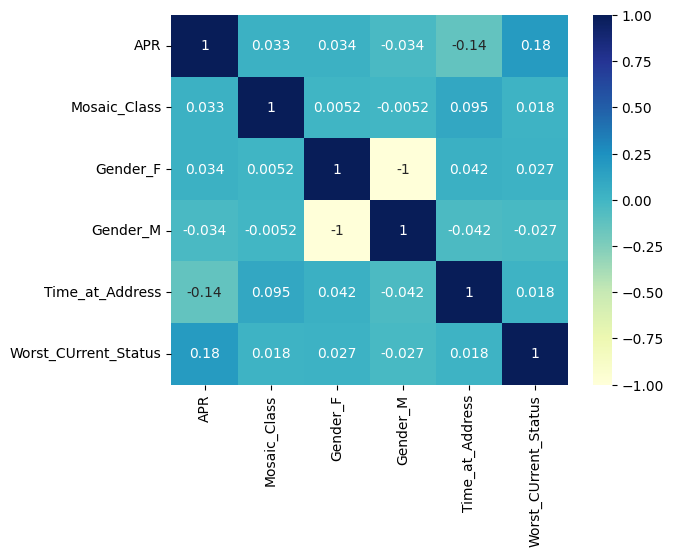

In [ ]:
# plotting correlation heatmap
dataplot = sns.heatmap(X_train.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

In [ ]:

def performance_met(model,X_train,Y_train,X_test,Y_test):

    acc_train=accuracy_score(Y_train, model.predict(X_train))

    f1_train=f1_score(Y_train, model.predict(X_train))

    acc_test=accuracy_score(Y_test, model.predict(X_test))

    f1_test=f1_score(Y_test, model.predict(X_test))

    print("train score: accuracy:{} f1:{}".format(acc_train,f1_train))

    print("test score: accuracy:{} f1:{}".format(acc_test,f1_test))

##Variable Selection
import statsmodels.api as sm
logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
print(result.summary2())

#Features = ['APR',  'Time_in_Employment', 'Time_at_Address', 'Mosaic_Class',  'Income_Range','Gender_F', 'Gender_M']

##somewhat ok
Features = ['APR',  'Mosaic_Class', 'Gender_F', 'Gender_M']




from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df1[Features],df1['PPI_SINGLE'],
                                   test_size = 0.3, random_state = 101)
X_train.shape,X_test.shape

##Variable Selection
import statsmodels.api as sm
logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Forest= RandomForestClassifier(random_state=1)
Forest.fit(X_train,Y_train)
performance_met(Forest,X_train,Y_train,X_test,Y_test)

Optimization terminated successfully.
         Current function value: 0.659340
         Iterations 4
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: PPI_SINGLE       Pseudo R-squared: 0.010     
Date:               2023-08-27 22:20 AIC:              15130.6337
No. Observations:   11468            BIC:              15160.0230
Df Model:           3                Log-Likelihood:   -7561.3   
Df Residuals:       11464            LL-Null:          -7640.5   
Converged:          1.0000           LLR p-value:      4.0481e-34
No. Iterations:     4.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
APR               0.0186   0.0020   9.3648 0.0000  0.0147  0.0225
Mosaic_Class      0.0547   0.0068   8.0883 0.0000  0.0415  0.0680


In [138]:
#Product Recommendation
df= pd.read_excel('/content/Cross Marketing Use Case Product.xlsx')


def data_prep(df):

  df=pd.get_dummies(df,columns=['Gender'] ,prefix='Gender')

  df["Mosaic_Class"] = pd.cut(df['Mosaic_Class'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 99, 100])
  df['Mosaic_Class']= df['Mosaic_Class'].cat.codes

  df["PPI_SINGLE"] = pd.cut(df['PPI_SINGLE'], bins=[0, 1])
  df['PPI_SINGLE']= df['PPI_SINGLE'].cat.codes

  df["PPI_JOINT"] = pd.cut(df['PPI_JOINT'], bins=[0, 1])
  df['PPI_JOINT']= df['PPI_JOINT'].cat.codes

  df["PPI_LCI"] = pd.cut(df['PPI_LCI'], bins=[0, 1])
  df['PPI_LCI']= df['PPI_LCI'].cat.codes


  df=pd.get_dummies(df,columns=['PPI_SINGLE'] ,prefix='PPI_SINGLE')
  df=pd.get_dummies(df,columns=['PPI_JOINT'] ,prefix='PPI_JOINT')
  df=pd.get_dummies(df,columns=['PPI_LCI'] ,prefix='PPI_LCI')

  return df
df2=data_prep(df)

df2.info()




Features = ['APR',  'Mosaic_Class', 'Gender_F', 'Gender_M', 'PPI_SINGLE_-1', 'PPI_SINGLE_0', 'PPI_JOINT_-1', 'PPI_JOINT_0', 'PPI_LCI_-1','PPI_LCI_0','Ref']



from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df2[Features],df2['PPI'],
                                   test_size = 0.3, random_state = 101)
X_train.shape,X_test.shape
X_train.head()


from sklearn.metrics.pairwise import pairwise_distances

F2 = ['APR',  'Mosaic_Class', 'Gender_F', 'Gender_M']
user_similarity = pairwise_distances(X_train[F2], metric='cosine')
user_similarity.shape

print(user_similarity)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9461 entries, 0 to 9460
Data columns (total 63 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ref                               9461 non-null   int64  
 1   Credit_Score                      9461 non-null   int64  
 2   Final_Grade                       9461 non-null   object 
 3   Term                              9461 non-null   int64  
 4   Net_Advance                       9461 non-null   float64
 5   APR                               9461 non-null   float64
 6   Loan_Type                         9461 non-null   object 
 7   Mosaic                            9461 non-null   int64  
 8   Mosaic_Class                      9461 non-null   int8   
 9   Time_at_Address                   9461 non-null   int64  
 10  Residential_Status                9461 non-null   object 
 11  Telephone_Indicator               9461 non-null   object 
 12  Number

In [140]:


policiescolumnlist = ['PPI_SINGLE_-1', 'PPI_SINGLE_0', 'PPI_JOINT_-1', 'PPI_JOINT_0', 'PPI_LCI_-1','PPI_LCI_0']

user_index=0

#extracting the list of policies which current user doesn't have
availablecollist=[]
for item in policiescolumnlist:
    if X_train.loc[user_index,item]==0:
        availablecollist.append(item)
        print(availablecollist)




KeyError: ignored

In [113]:
no_of_policies=1 #you can set this variable value as min number of policies you want to recommend.
output=dict()
i=1
while i < 4:
    opdf=X_train.iloc[user_similarity[user_index].argsort()[(i-1)*10:i*10], 35:48] #list of indexes of row
    tempoutput=dict(opdf[availablecollist].sum().sort_values()[opdf[availablecollist].sum().sort_values()>0])
    output.update(tempoutput)
    if len(output)>=no_of_policies:
        break
    i+=1
    if i>50:
        print("There are no products, as per top 100 similar people")
        break
output

KeyError: ignored

In [108]:
print(user_similarity)

[[0.         0.02256326 0.00403493 ... 0.00308952 0.04046871 0.01704921]
 [0.02256326 0.         0.01599778 ... 0.00919039 0.00282118 0.00116541]
 [0.00403493 0.01599778 0.         ... 0.00415552 0.03202904 0.0147813 ]
 ...
 [0.00308952 0.00919039 0.00415552 ... 0.         0.02137834 0.00565874]
 [0.04046871 0.00282118 0.03202904 ... 0.02137834 0.         0.00543129]
 [0.01704921 0.00116541 0.0147813  ... 0.00565874 0.00543129 0.        ]]
